# Project 4: Clustering Horror Movies

I've watched horror movies ever since I was a kid. Over the years, it's become increasingly challenging to discover ones I haven't already seen. As my list of viewed mainstream movies expands, I find myself delving deeper into niche movies.  Although,  I don't want to spend half of a movie just to figure out if I'll enjoy it or not. The main question I have is can I utilize clustering to identify horror movies I haven't watched and might enjoy?

## What Is Clustering?

Clustering is a machine learning technique that involves grouping data points. Data points in the same group have similar properties, while data in different groups have dissimilar properties.

In this project, I'm going to use a specific type of clustering called K-Means clustering. For K-Means Clustering, we must first decide how many clusters we want to have. We can decide on this by using what's called the elbow method. 

The elbow method calculates and graphs the sum of the square distance between points in a cluster and the center of the cluster. It does this for a range of clusters, usually 1-10, and the number of clusters is decided on which K in the graph represents an "elbow".

After deciding on how many clusters we want to have in our model, we randomly initialize the centroids of each cluster. Each data point is categorized by calculating it's distance between each centroid and classifying the point to be in the group whose center is closest. After all data points are clustered, the center of each cluster is recalculated by taking the mean of its data points. This process is repeated until the clusters stop changing.

## Introducing The Data

Introduce the data
Where did you find it? What is the data about (include links)? What are the features (with additional explanations if not already self-explanatory from the name itself)?

I found my dataset on [Kaggle](https://www.kaggle.com/datasets/sujaykapadnis/horror-movies-dataset). The dataset includes horror movies dating back from the 1950s. The data includes 32,540 rows and 20 columns. The columns include:
- id
- original title
- title
- original language
- movie description
- movie tagline
- release date
- a url path to the poster
- popularity (as of September 2023)
- vote count (number of ratings)
- vote average 
- budget
- revenue
- runtime in minutes
- status (eg: released)
- genre
- collection id
- collection name (series name)

In [2]:
#import stuff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv("horror_movies.csv")
df = pd.DataFrame(data,columns = data.columns)
df.head()

,id,original_title,title,original_language,overview,tagline,release_date,poster_path,popularity,vote_count,vote_average,budget,revenue,runtime,status,adult,backdrop_path,genre_names,collection,collection_name
0,760161,Orphan: First Kill,Orphan: First Kill,en,After escaping from an Estonian psychiatric fa...,There's always been something wrong with Esther.,2022-07-27,/pHkKbIRoCe7zIFvqan9LFSaQAde.jpg,5088.584,902,6.9,0,9572765,99,Released,False,/5GA3vV1aWWHTSDO5eno8V5zDo8r.jpg,"Horror, Thriller",760193.0,Orphan Collection
1,760741,Beast,Beast,en,A recently widowed man and his two teenage dau...,Fight for family.,2022-08-11,/xIGr7UHsKf0URWmyyd5qFMAq4d8.jpg,2172.338,584,7.1,0,56000000,93,Released,False,/2k9tBql5GYH328Krj66tDT9LtFZ.jpg,"Adventure, Drama, Horror",NaN,NaN
2,882598,Smile,Smile,en,"After witnessing a bizarre, traumatic incident...","Once you see it, it’s too late.",2022-09-23,/hiaeZKzwsk4y4atFhmncO5KRxeT.jpg,1863.628,114,6.8,17000000,45000000,115,Released,False,/mVNPfpydornVe4H4UCIk7WevWjf.jpg,"Horror, Mystery, Thriller",NaN,NaN
3,756999,The Black Phone,The Black Phone,en,"Finney Blake, a shy but clever 13-year-old boy...",Never talk to strangers.,2022-06-22,/lr11mCT85T1JanlgjMuhs9nMht4.jpg,1071.398,2736,7.9,18800000,161000000,103,Released,False,/AfvIjhDu9p64jKcmohS4hsPG95Q.jpg,"Horror, Thriller",NaN,NaN
4,772450,Presencias,Presences,es,A man who loses his wife and goes to seclude h...,NaN,2022-09-07,/dgDT3uol3mdvwEg0jt1ble3l9hw.jpg,1020.995,83,7.0,0,0,0,Released,False,/ojfzhdwRemcDt1I6pao6vVLw9AA.jpg,Horror,NaN,NaN


## Data Pre-Processing

In [18]:
df.isnull().sum()

id                       0
original_title           0
title                    0
original_language        0
overview              1286
tagline              19833
release_date             0
poster_path           4474
popularity               0
vote_count               0
vote_average             0
budget                   0
revenue                  0
runtime                  0
status                   0
adult                    0
backdrop_path        18995
genre_names              0
collection           30234
collection_name      30234
dtype: int64

Checking for nulls, given that most of the nulls are in columns that won't be necessary for this project, I'm going to drop the null values

In [22]:
df = df.dropna()

The data is well-structured and contains the information I need, so that will be it for pre-processing

## Data Visualization

In this step, I will be delving deeper into the data to get a better understanding and pick out features to use in my clustering model

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32540 entries, 0 to 32539
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 32540 non-null  int64  
 1   original_title     32540 non-null  object 
 2   title              32540 non-null  object 
 3   original_language  32540 non-null  object 
 4   overview           31254 non-null  object 
 5   tagline            12707 non-null  object 
 6   release_date       32540 non-null  object 
 7   poster_path        28066 non-null  object 
 8   popularity         32540 non-null  float64
 9   vote_count         32540 non-null  int64  
 10  vote_average       32540 non-null  float64
 11  budget             32540 non-null  int64  
 12  revenue            32540 non-null  int64  
 13  runtime            32540 non-null  int64  
 14  status             32540 non-null  object 
 15  adult              32540 non-null  bool   
 16  backdrop_path      135

As you can see, there are many object types, most likely referring to the string values of each movie.

In [6]:
df.describe()

,id,popularity,vote_count,vote_average,budget,revenue,runtime,collection
count,3.254000e+04,32540.000000,32540.000000,32540.000000,3.254000e+04,3.254000e+04,32540.000000,2.306000e+03
mean,4.459108e+05,4.013456,62.691487,3.335728,5.431266e+05,1.349747e+06,62.142901,4.815349e+05
std,3.057447e+05,37.513472,420.887474,2.876002,4.542668e+06,1.443048e+07,40.998527,3.244982e+05
min,1.700000e+01,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,6.560000e+02
25%,1.464948e+05,0.600000,0.000000,0.000000,0.000000e+00,0.000000e+00,14.000000,1.554210e+05
50%,4.265210e+05,0.840000,2.000000,4.000000,0.000000e+00,0.000000e+00,80.000000,4.712590e+05
75%,7.075340e+05,2.243250,11.000000,5.700000,0.000000e+00,0.000000e+00,91.000000,7.590672e+05
max,1.033095e+06,5088.584000,16900.000000,10.000000,2.000000e+08,7.018426e+08,683.000000,1.033032e+06


Given from this graph, the movies in this dataset contain, on average, 62 votes and a 3.34/10 rating.

Next, I'm going to use a heatmap to choose features in our clustering model.

<Axes: >

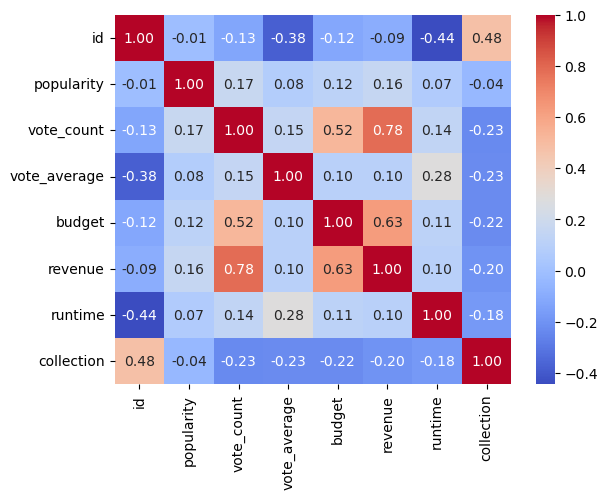

In [14]:
df_corr=df.select_dtypes(include=['int', 'float'])#only using float and int values

sns.heatmap(df_corr.corr(),annot=True, fmt=".2f", cmap='coolwarm')

The strongest correlation seems to be with revenue and vote count which makes sense. High revenue movies tend to have more ratings, whether good or bad. Budget and revenue also have a correlation, suggesting that the higher a movie budget, the more generated revenue.

From this heatmap, my chosen features are going to be revenue, vote count, and budget. I'm also going to include popularity and vote average, as I'm curious to see how these two features will affect our clusters.

## Modeling

In [57]:
from sklearn.cluster import KMeans
import plotly.express as px

I'm going to be using K-Means clustering over agglomerative clustering due to having a large dataset (agglomerative clustering is resource-intensive). Also, agglomerative clustering is more sensitive to outliers. From our data visualization section, we see that on average, movies have a rating of 3.3/10 and the highest movie rating is a 10/10. The average vote count is 62 with the highest vote count being 16,900.

As I stated before, I'm going to be using revenue, vote count, budget, popularity and vote average for our features.

In [23]:
X = df[["revenue","vote_count","budget","popularity","vote_average"]]

Before we can train our model, we have to specify the amount of clusters, K, we want. We can decide on an amount using the elbow method, as mentioned before.

Text(0, 0.5, 'Variance')

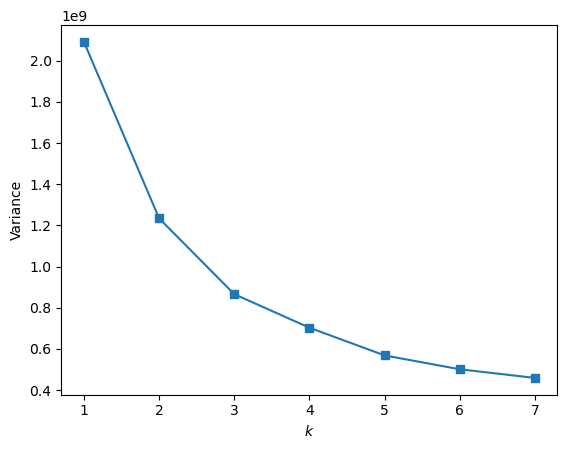

In [28]:
inertia = []
for k in range(1,8):
    kmeans = KMeans(n_clusters=k, random_state=1,init="k-means++", n_init=10).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))
plt.plot(range(1, 8), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('Variance')

I'd say the elbow point would be at 3, because the variance decrease rate starts to flatten out.

In [32]:
kmeans = KMeans(n_clusters=3, random_state=1, n_init=10).fit(X)
y = kmeans.fit_predict(X)

<Axes: xlabel='vote_count', ylabel='revenue'>

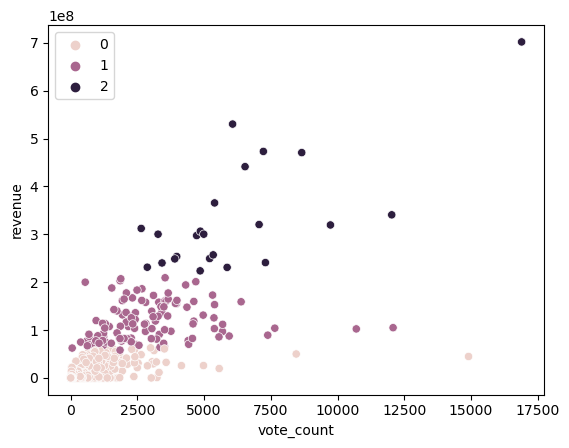

In [53]:
sns.scatterplot(x = X["vote_count"], y = X["revenue"], hue=y)

In [59]:
fig = px.scatter(df,
                 x = "vote_count", y = "revenue", color=y, hover_data=['title', 'vote_average','popularity'])
fig.show()

## Clustering Analysis

It seems that movies are clustered based on how much revenue they generated. Using the interactive cluster, in the jupyter notebook linked below, I was able to gain some more insight on which specific movies were in each cluster. There are two main outliers: It (2017) and The Shining. One surprising piece of information is The Shining being clustered in cluster 1 (low revenue) despite having the second highest vote count at almost 15k and a vote average of 8.2/10. This suggests that as time went on, the movie gained appreciation. Pointing back to my motivation for this project, I'm able to find horror movies that I have not watched before. Just out of cluster 3, this includes the Resident Evil series, The Meg, the Alien series, and others.

## Impact

An impact this project could have is discovering new movies that you may end up loving. A negative impact could be placing too much emphasis on mainstream blockbusters. The intention of this was to find lesser-known horror movies but I can see how people can overlook this.

## References

- [Kaggle Dataset](https://www.kaggle.com/datasets/sujaykapadnis/horror-movies-dataset)
- [Elbow Method]("https://www.analyticsvidhya.com/blog/2021/01/in-depth-intuition-of-k-means-clustering-algorithm-in-machine-learning/#What_Is_the_Elbow_Method_in_K-Means_Clustering?")